<a href="https://colab.research.google.com/github/limeng1011/2002electionanalysis/blob/main/ElectionAnalysis022622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
from io import StringIO

In [ ]:
import requests


In [ ]:
url = 'https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text
poll_data = StringIO(source)

In [ ]:
poll_data

In [ ]:
poll_df = pd.read_csv(poll_data)

In [ ]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [ ]:
poll_df2 = pd.read_csv('2012-general-election-romney-vs-obama.csv', parse_dates=['Start Date', 'End Date', 'Entry Date/Time (ET)'])

In [ ]:
poll_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Pollster                586 non-null    object             
 1   Start Date              586 non-null    datetime64[ns]     
 2   End Date                586 non-null    datetime64[ns]     
 3   Entry Date/Time (ET)    586 non-null    datetime64[ns, UTC]
 4   Number of Observations  564 non-null    float64            
 5   Population              586 non-null    object             
 6   Mode                    586 non-null    object             
 7   Obama                   586 non-null    float64            
 8   Romney                  586 non-null    float64            
 9   Undecided               423 non-null    float64            
 10  Other                   202 non-null    float64            
 11  Pollster URL            586 non-null    objec

In [ ]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


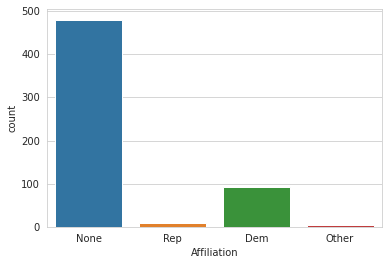

In [ ]:
sns.countplot('Affiliation', data=poll_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


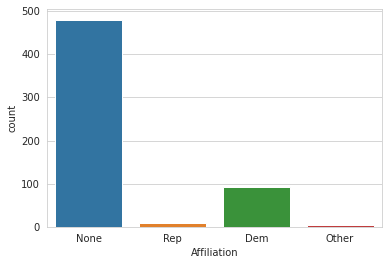

In [ ]:
sns.countplot('Affiliation', data=poll_df2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


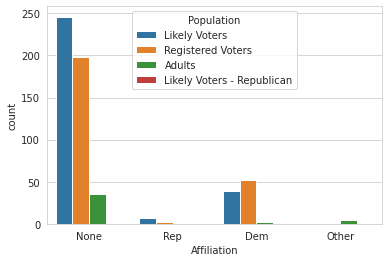

In [ ]:
sns.countplot('Affiliation', data=poll_df, hue='Population')

In [ ]:
poll_df['Population'].value_counts()

Likely Voters                 292
Registered Voters             252
Adults                         41
Likely Voters - Republican      1
Name: Population, dtype: int64

In [ ]:
px.bar(x = poll_df['Population'].value_counts().index,
       y = poll_df['Population'].value_counts().values,
       color = poll_df['Population'].value_counts().values,
       color_continuous_scale = 'matter')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


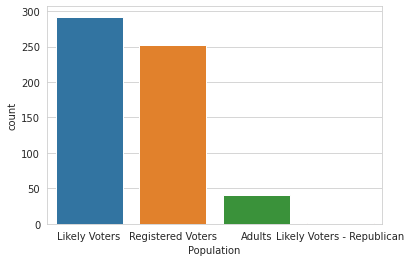

In [ ]:
sns.countplot('Population', data=poll_df)

In [ ]:
poll_df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Number of Observations    1296.679078
Obama                       46.805461
Romney                      44.614334
Undecided                    6.550827
Other                        3.376238
Question Text                     NaN
Question Iteration           1.000000
dtype: float64

In [ ]:
avg = pd.DataFrame(poll_df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
avg.drop(['Number of Observations', 'Question Text', 'Question Iteration'], axis=0, inplace=True)

In [ ]:
std = poll_df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
std = pd.DataFrame(poll_df.std())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
std.drop(['Number of Observations', 'Question Text', 'Question Iteration'], axis=0, inplace=True)

In [ ]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


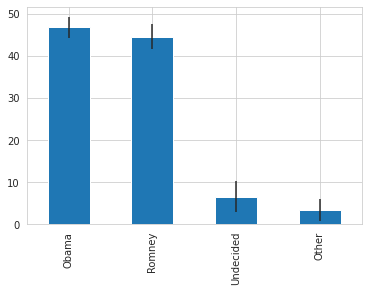

In [ ]:
avg.plot(yerr=std, kind='bar', legend=False)

<BarContainer object of 4 artists>

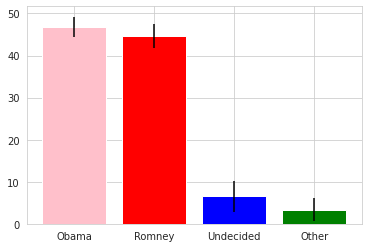

In [ ]:
plt.bar(x = avg.index,
        height = avg[0],
        color = ['pink','red','blue','green'],
        yerr = std[0])

In [ ]:
px.bar(data_frame=avg,
       x = avg.index, 
       y = avg[0],
       color = avg[0],
       error_y = std[0])

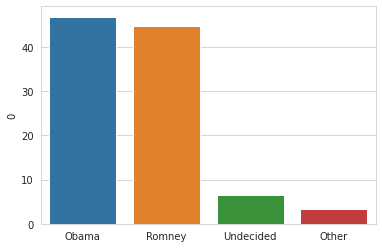

In [ ]:
sns.barplot(data = avg,
            x = avg.index,
            y = avg[0])

In [ ]:
poll_avg = pd.concat([avg,std], axis=1)

In [ ]:
poll_avg.columns = ['Average', 'STD']

In [ ]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


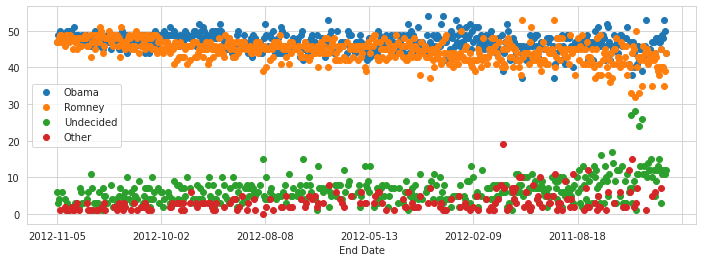

In [ ]:
poll_df.plot(x = 'End Date', y = ['Obama', 'Romney', 'Undecided', 'Other'], linestyle ='', marker='o', figsize=(12,4))

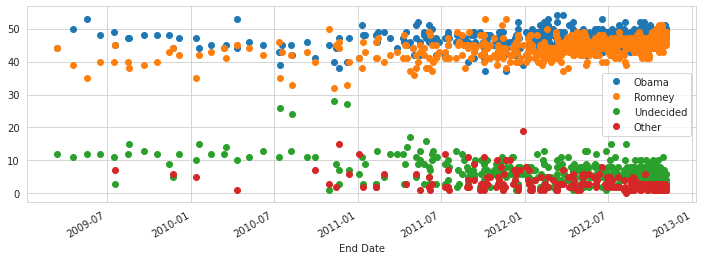

In [ ]:
poll_df2.plot(x = 'End Date', y = ['Obama', 'Romney', 'Undecided', 'Other'], linestyle ='', marker='o', figsize=(12,4))

In [ ]:
poll_df2.sort_values('End Date')

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
585,PPP (D),2009-03-13,2009-03-15,2010-11-08 10:36:31+00:00,1403.0,Registered Voters,Automated Phone,44.0,44.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/PPP_Rel...,Pollster,Dem,NaN,1
584,PPP (D),2009-04-17,2009-04-19,2010-11-08 10:45:18+00:00,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
583,PPP (D),2009-05-14,2009-05-18,2010-11-08 10:49:08+00:00,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
582,PPP (D),2009-06-12,2009-06-16,2010-11-08 10:58:00+00:00,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
581,PPP (D),2009-07-15,2009-07-16,2010-11-08 11:02:37+00:00,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 08:47:50+00:00,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06 08:51:48+00:00,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 09:22:02+00:00,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26 15:31:23+00:00,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1


In [ ]:
poll_df.sort_values('End Date')

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
585,PPP (D),2009-03-13,2009-03-15,2010-11-08T10:36:31Z,1403.0,Registered Voters,Automated Phone,44.0,44.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/PPP_Rel...,Pollster,Dem,NaN,1
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1


In [ ]:
poll_df['Difference'] = (poll_df['Obama'] - poll_df['Romney']) / 100

In [ ]:
poll_df2['Difference'] = (poll_df['Obama'] - poll_df['Romney']) / 100

In [ ]:
poll_df2 = poll_df2.groupby('Start Date', as_index = False).mean()

In [ ]:
poll_df2

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.000000,44.00,44.00,12.000000,NaN,NaN,1.0,0.0000
1,2009-04-17,686.000000,50.00,39.00,11.000000,NaN,NaN,1.0,0.1100
2,2009-05-14,1000.000000,53.00,35.00,12.000000,NaN,NaN,1.0,0.1800
3,2009-06-12,638.000000,48.00,40.00,12.000000,NaN,NaN,1.0,0.0800
4,2009-07-15,577.000000,49.00,40.00,11.000000,NaN,NaN,1.0,0.0900
...,...,...,...,...,...,...,...,...,...
352,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1.0,0.0150
353,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1.0,0.0175
354,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1.0,0.0075
355,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1.0,0.0050


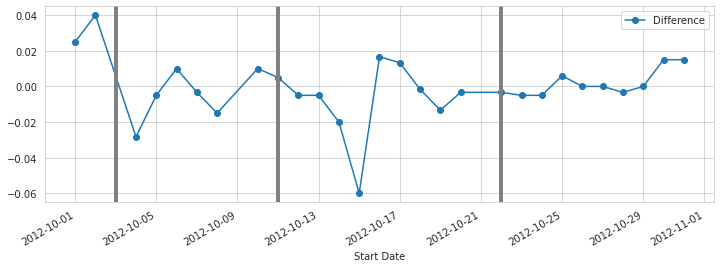

In [ ]:
poll_df2[(poll_df2['Start Date'].dt.year==2012) & (poll_df2['Start Date'].dt.month==10)].plot('Start Date', 'Difference', marker='o', figsize=(12,4))
plt.axvline(x='2012-10-03', linewidth=4, color='grey')
plt.axvline(x='2012-10-11', linewidth=4, color='grey')
plt.axvline(x='2012-10-22', linewidth=4, color='grey')

In [ ]:
donor_df = pd.read_csv('Election_Donor_Data.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [ ]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [ ]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [ ]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()

In [ ]:
don_mean

298.2351500951853

In [ ]:
don_std

3749.666723292233

In [ ]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor = top_donor[top_donor > 0]

In [ ]:
top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

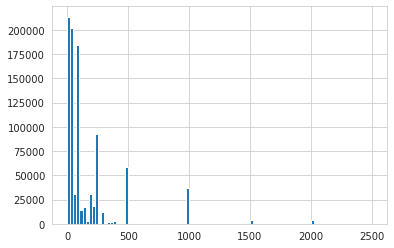

In [ ]:
com_don = top_donor[top_donor < 2500]
plt.hist(com_don.values,
         bins=100)
plt.show()

In [ ]:
candidates = donor_df['cand_nm'].unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [ ]:
party_map = {'Bachmann, Michelle':'Republican', 
             'Romney, Mitt':'Republican', 
             'Obama, Barack':'Democrat',
             "Roemer, Charles E. 'Buddy' III":'Republican',
             'Pawlenty, Timothy':'Republican',
             'Johnson, Gary Earl':'Republican', 
             'Paul, Ron':'Republican', 
             'Santorum, Rick':'Republican',
             'Cain, Herman':'Republican', 
             'Gingrich, Newt':'Republican', 
             'McCotter, Thaddeus G':'Republican',
             'Huntsman, Jon':'Republican', 
             'Perry, Rick':'Republican'}

In [ ]:
donor_df['Party'] = donor_df['cand_nm'].map(party_map)

In [ ]:
donor_df['Party2'] = np.where(donor_df['cand_nm']=='Obama, Barack', 'Democrat','Republican')

In [ ]:
donor_df.tail()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party,Party2
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican,Republican
1001730,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,2500.0,31-AUG-11,NaN,NaN,NaN,SA17A,751678,Republican,Republican


In [ ]:
donor_df = donor_df[donor_df['contb_receipt_amt']>0]

In [ ]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [ ]:
donor_df.groupby('cand_nm', as_index=False)['contb_receipt_amt'].sum()

,cand_nm,contb_receipt_amt
0,"Bachmann, Michelle",2.711439e+06
1,"Cain, Herman",7.101082e+06
2,"Gingrich, Newt",1.283277e+07
3,"Huntsman, Jon",3.330373e+06
4,"Johnson, Gary Earl",5.669616e+05
5,"McCotter, Thaddeus G",3.903000e+04
6,"Obama, Barack",1.358774e+08
7,"Paul, Ron",2.100962e+07
8,"Pawlenty, Timothy",6.004819e+06
9,"Perry, Rick",2.030575e+07


In [ ]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0
for don in cand_amount:
  print (f'The candidate {cand_amount.index[i]} raised ${don:.0f} dollars.')
  i += 1

The candidate Bachmann, Michelle raised $2711439
The candidate Cain, Herman raised $7101082
The candidate Gingrich, Newt raised $12832770
The candidate Huntsman, Jon raised $3330373
The candidate Johnson, Gary Earl raised $566962
The candidate McCotter, Thaddeus G raised $39030
The candidate Obama, Barack raised $135877427
The candidate Paul, Ron raised $21009620
The candidate Pawlenty, Timothy raised $6004819
The candidate Perry, Rick raised $20305754
The candidate Roemer, Charles E. 'Buddy' III raised $373010
The candidate Romney, Mitt raised $88335908
The candidate Santorum, Rick raised $11043159


In [ ]:
for name,money in cand_amount.items():
  print (f'The candidate {name} raised ${money:.0f} dollars.')

The candidate Bachmann, Michelle raised $2711439 dollars.
The candidate Cain, Herman raised $7101082 dollars.
The candidate Gingrich, Newt raised $12832770 dollars.
The candidate Huntsman, Jon raised $3330373 dollars.
The candidate Johnson, Gary Earl raised $566962 dollars.
The candidate McCotter, Thaddeus G raised $39030 dollars.
The candidate Obama, Barack raised $135877427 dollars.
The candidate Paul, Ron raised $21009620 dollars.
The candidate Pawlenty, Timothy raised $6004819 dollars.
The candidate Perry, Rick raised $20305754 dollars.
The candidate Roemer, Charles E. 'Buddy' III raised $373010 dollars.
The candidate Romney, Mitt raised $88335908 dollars.
The candidate Santorum, Rick raised $11043159 dollars.


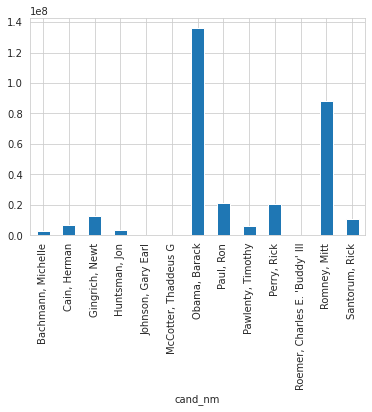

In [ ]:
cand_amount.plot(kind = 'bar')

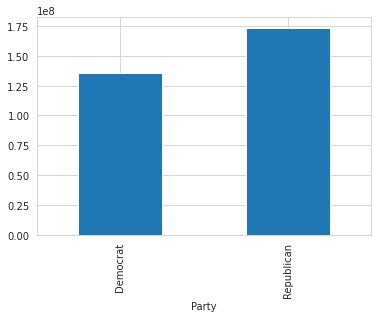

In [ ]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind = 'bar')

In [ ]:
donor_df[donor_df['contbr_occupation']=='INFORMATION REQUESTED PER BEST EFFORTS'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


cmte_id              C00431171C00431171C00431171C00431171C00431171C...
cand_id              P80003353P80003353P80003353P80003353P80003353P...
cand_nm              Romney, MittRomney, MittRomney, MittRomney, Mi...
contbr_nm            SANTALIZ, RAFAEL MR. JR.POWELL, J. FRANCES MR....
contbr_st            AEAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...
contbr_employer      INFORMATION REQUESTED PER BEST EFFORTSINFORMAT...
contbr_occupation    INFORMATION REQUESTED PER BEST EFFORTSINFORMAT...
contb_receipt_amt                                          16340533.64
contb_receipt_dt     14-FEB-1209-APR-1213-APR-1231-MAR-1223-MAR-122...
form_tp              SA17ASA17ASA17ASA17ASA17ASA17ASA17ASA17ASA17AS...
file_num                                                   16330646182
Party                RepublicanRepublicanRepublicanRepublicanRepubl...
Party2               RepublicanRepublicanRepublicanRepublicanRepubl...
dtype: object

In [ ]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                     index = 'contbr_occupation',
                                     columns = 'Party',
                                     aggfunc = 'sum')

In [ ]:
occupation_df = occupation_df[(occupation_df['Democrat']+occupation_df['Republican']) >= 1000000]

In [ ]:
occupation_df.drop(['INFORMATION REQUESTED'], axis=0, inplace=True)

In [ ]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace=True)

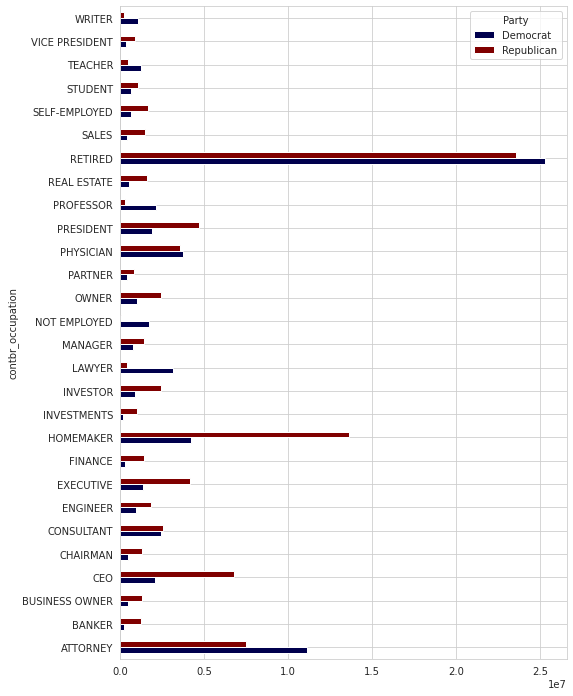

In [ ]:
occupation_df.plot(kind = 'barh', figsize = (8,12), cmap='seismic')

In [ ]:
poll_df.groupby('Start Date', as_index=False).mean()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.000000,44.00,44.00,12.000000,NaN,NaN,1.0,0.0000
1,2009-04-17,686.000000,50.00,39.00,11.000000,NaN,NaN,1.0,0.1100
2,2009-05-14,1000.000000,53.00,35.00,12.000000,NaN,NaN,1.0,0.1800
3,2009-06-12,638.000000,48.00,40.00,12.000000,NaN,NaN,1.0,0.0800
4,2009-07-15,577.000000,49.00,40.00,11.000000,NaN,NaN,1.0,0.0900
...,...,...,...,...,...,...,...,...,...
352,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1.0,0.0150
353,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1.0,0.0175
354,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1.0,0.0075
355,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1.0,0.0050


In [ ]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [ ]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [ ]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


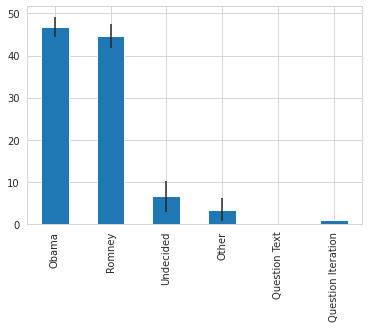

In [ ]:
avg.plot(yerr=std, kind='bar',legend=False)

In [ ]:
poll_avg = pd.concat([avg, std], axis=1)

In [ ]:
poll_avg.columns = ['Average', 'STD']

In [ ]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


In [ ]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


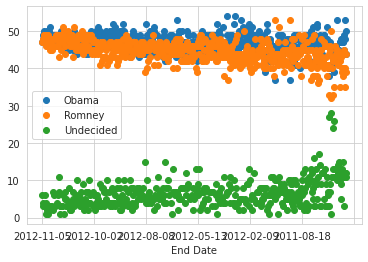

In [ ]:
poll_df.plot(x='End Date', y=['Obama','Romney','Undecided'], linestyle='', marker='o')

In [ ]:
from datetime import datetime

In [ ]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


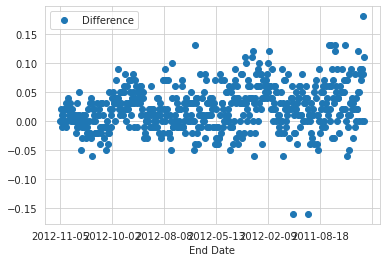

In [ ]:
poll_df.plot(x='End Date', y='Difference', linestyle='', marker='o')

In [ ]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1.0,0.09


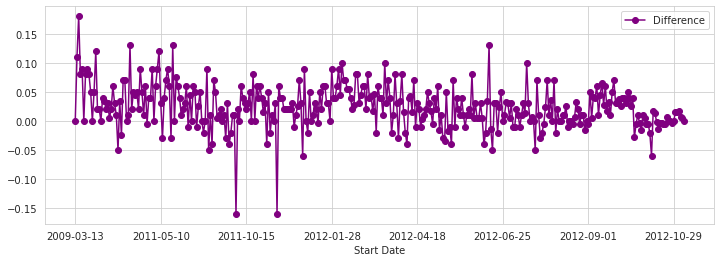

In [ ]:
poll_df.plot(x='Start Date', y='Difference', figsize=(12,4), marker='o', linestyle='-', color='purple')

In [ ]:
row_in = 0
xlimit = []
for date in poll_df['Start Date']:
  if date[:7] == '2012-10':
    xlimit.append(row_in)
    row_in += 1
  else:
    row_in += 1
print (min(xlimit))
print (max(xlimit))

325
352


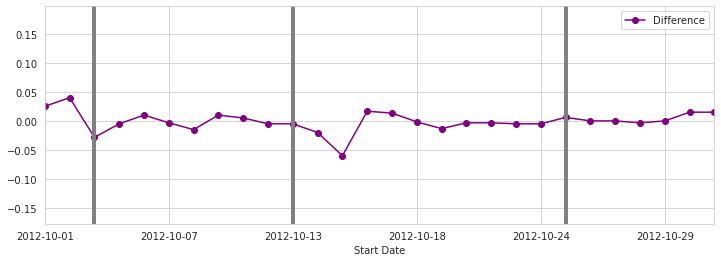

In [ ]:
poll_df.plot(x='Start Date', y='Difference', figsize=(12,4), marker='o', linestyle='-', color='purple', xlim=(325,352))
plt.axvline(x=325+2, linewidth = 4, color='grey')
plt.axvline(x=325+10, linewidth = 4, color='grey')
plt.axvline(x=325+21, linewidth = 4, color='grey')

In [ ]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [ ]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [ ]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [ ]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()

In [ ]:
don_mean, don_std

(298.2351500951093, 3749.666723269043)

In [ ]:
donor_df['contb_receipt_amt'].describe()

count    1.001731e+06
mean     2.982352e+02
std      3.749667e+03
min     -3.080000e+04
25%      3.500000e+01
50%      1.000000e+02
75%      2.500000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

In [ ]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor = top_donor[top_donor > 0]
top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [ ]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

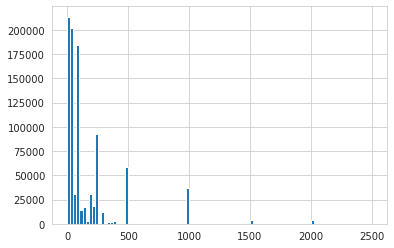

In [ ]:
com_don = top_donor[top_donor <2500]
com_don.hist(bins=100)

In [ ]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [ ]:
party_map = {
    'Bachmann, Michelle': 'Republican', 
    'Romney, Mitt': 'Republican', 
    'Obama, Barack': "Democrat",
    "Roemer, Charles E. 'Buddy' III": 'Republican', 
    'Pawlenty, Timothy': 'Republican',
    'Johnson, Gary Earl': 'Republican', 
    'Paul, Ron': 'Republican', 
    'Santorum, Rick': 'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt': 'Republican', 
    'McCotter, Thaddeus G': 'Republican',
    'Huntsman, Jon': 'Republican', 
    'Perry, Rick': 'Republican'
}

In [ ]:
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [ ]:
donor_df = donor_df[donor_df['contb_receipt_amt']>0]

In [ ]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [ ]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [ ]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [ ]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0
for don in cand_amount:
  print (f'The candidate {cand_amount[i].name} raise {cand_amounts[i]} dollars.')
  i+=1

AttributeError: ignored

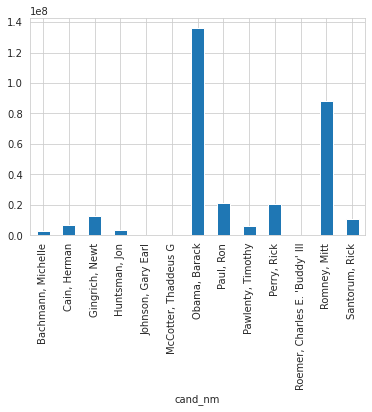

In [ ]:
cand_amount.plot(kind='bar')

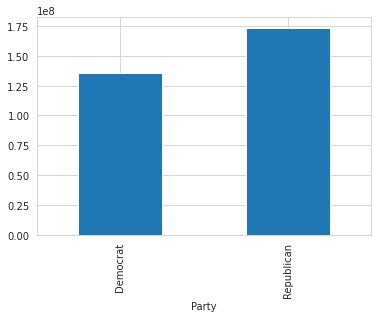

In [ ]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [ ]:
occupation_df = donor_df.pivot_table('contb_receipt_amt', 
                                     index='contbr_occupation',
                                     columns = 'Party',
                                     aggfunc = 'sum')

In [ ]:
occupation_df.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [ ]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45067 entries,    MIXED-MEDIA ARTIST / STORYTELLER to ~
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Democrat    29166 non-null  float64
 1   Republican  21081 non-null  float64
dtypes: float64(2)
memory usage: 2.0+ MB


In [ ]:
occupation_df.shape

(45067, 2)

In [ ]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [ ]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41


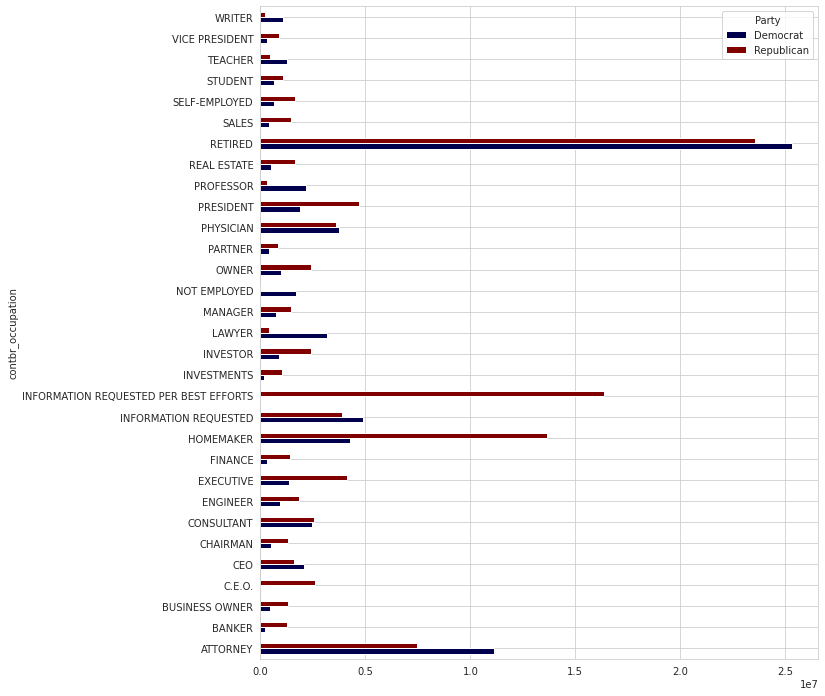

In [ ]:
occupation_df.plot(kind='barh', figsize=(10,12), cmap='seismic')

In [ ]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)

In [ ]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

In [ ]:
occupation_df.drop('C.E.O.')

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
CEO,2074974.79,4211040.52
CHAIRMAN,496547.00,1296092.75
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
FINANCE,296031.40,1402514.91
